In [3]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings("ignore")

# Machine Learning models and evaluation
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# For statistical analysis
import scipy.stats as stats


In [7]:
# Load the dataset using your local path
file_path = r"D:\New folder (2)\unified mentor project\Life Expectancy Data.csv"  # The 'r' handles backslashes correctly
df = pd.read_csv(file_path)

# Display the first 5 rows to confirm loading
df.head()


Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.0               8.16         65.0        0.1  584.259210  33736494.0   
1   58.0               8.18         62.0        0.1  612.696514    327582.0   
2   62.0               8.13         64.0        0.1  631.744976  31731688.0   
3   67.0               8.52         67.0        0.1  669.959000   3696958.0   
4   68.0               7.87         68.0        0.1   63.537231   2978599.0   

    thinness  1-19 years   thinness 5-9 years  \
0                   17.2                 17.3   
1                   17.5                 17.5   
2                   17.7                 17.7   
3                   17.9                 18.0   
4                   18.2                 18.2   

   Income composition of resources  Schooling  
0                            0.479       10.1  
1                            0.476       10.0  
2                            0.470        9.9  
3                            0.463        9.8  
4                            0.454        9.5  

[5 rows x 22 columns]

In [9]:
# Check the shape and basic info
print("Shape of dataset:", df.shape)
print("\nInfo about dataset:")
df.info()

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Check basic statistics
print("\nSummary statistics:")
print(df.describe())

# Check unique values in 'Status' (to understand the encoding needs)
print("\nUnique values in 'Status' column:")
print(df['Status'].unique())

# Optional: strip whitespaces from column names
df.columns = df.columns.str.strip()

# Handle missing values (basic strategy: fill or drop)
# Example: Filling missing values with median for numerical columns
df.fillna(df.median(numeric_only=True), inplace=True)

# Check again after filling
print("\nMissing values after imputation:")
print(df.isnull().sum())


Shape of dataset: (2938, 22)

Info about dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths               

In [13]:
# Strip whitespace from column names
df.columns = df.columns.str.strip()

# Optional: Rename columns for better access (snake_case)
df.columns = df.columns.str.lower().str.replace(' ', '_')


In [15]:
# Check how many missing values per column
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_data, 'Percentage': missing_percent})
print(missing_df.sort_values(by='Percentage', ascending=False))


                                 Missing Values  Percentage
country                                       0         0.0
year                                          0         0.0
income_composition_of_resources               0         0.0
thinness_5-9_years                            0         0.0
thinness__1-19_years                          0         0.0
population                                    0         0.0
gdp                                           0         0.0
hiv/aids                                      0         0.0
diphtheria                                    0         0.0
total_expenditure                             0         0.0
polio                                         0         0.0
under-five_deaths                             0         0.0
bmi                                           0         0.0
measles                                       0         0.0
hepatitis_b                                   0         0.0
percentage_expenditure                  

In [19]:
# Fill numeric columns with median
num_cols = df.select_dtypes(include=np.number).columns.tolist()
df[num_cols] = df[num_cols].fillna(df[num_cols].median())

# Fill categorical columns with mode
cat_cols = df.select_dtypes(include='object').columns.tolist()
for col in cat_cols:
    df[col] = df[col].fillna(df[col].mode()[0])


In [21]:
print("Duplicates found:", df.duplicated().sum())
df = df.drop_duplicates()


Duplicates found: 0


In [39]:
print(df.columns.tolist())


['country', 'year', 'status', 'life_expectancy', 'adult_mortality', 'infant_deaths', 'alcohol', 'percentage_expenditure', 'hepatitis_b', 'measles', 'bmi', 'under-five_deaths', 'polio', 'total_expenditure', 'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness__1-19_years', 'thinness_5-9_years', 'income_composition_of_resources', 'schooling']


In [35]:
# Example: Capitalize all entries in 'status' column
if 'status' in df.columns:
    df['status'] = df['status'].str.strip().str.title()

# Check unique values in any categorical column
print(df['status'].unique())


['Developing' 'Developed']


In [37]:
# Convert 'year' to int
df['year'] = df['year'].astype(int)

# Convert any relevant columns to category
df['status'] = df['status'].astype('category')


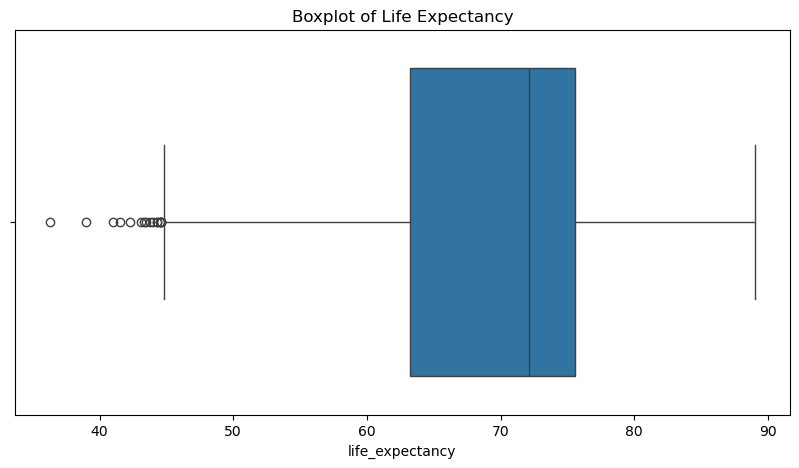

In [43]:
# boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['life_expectancy'])
plt.title('Boxplot of Life Expectancy')
plt.show()



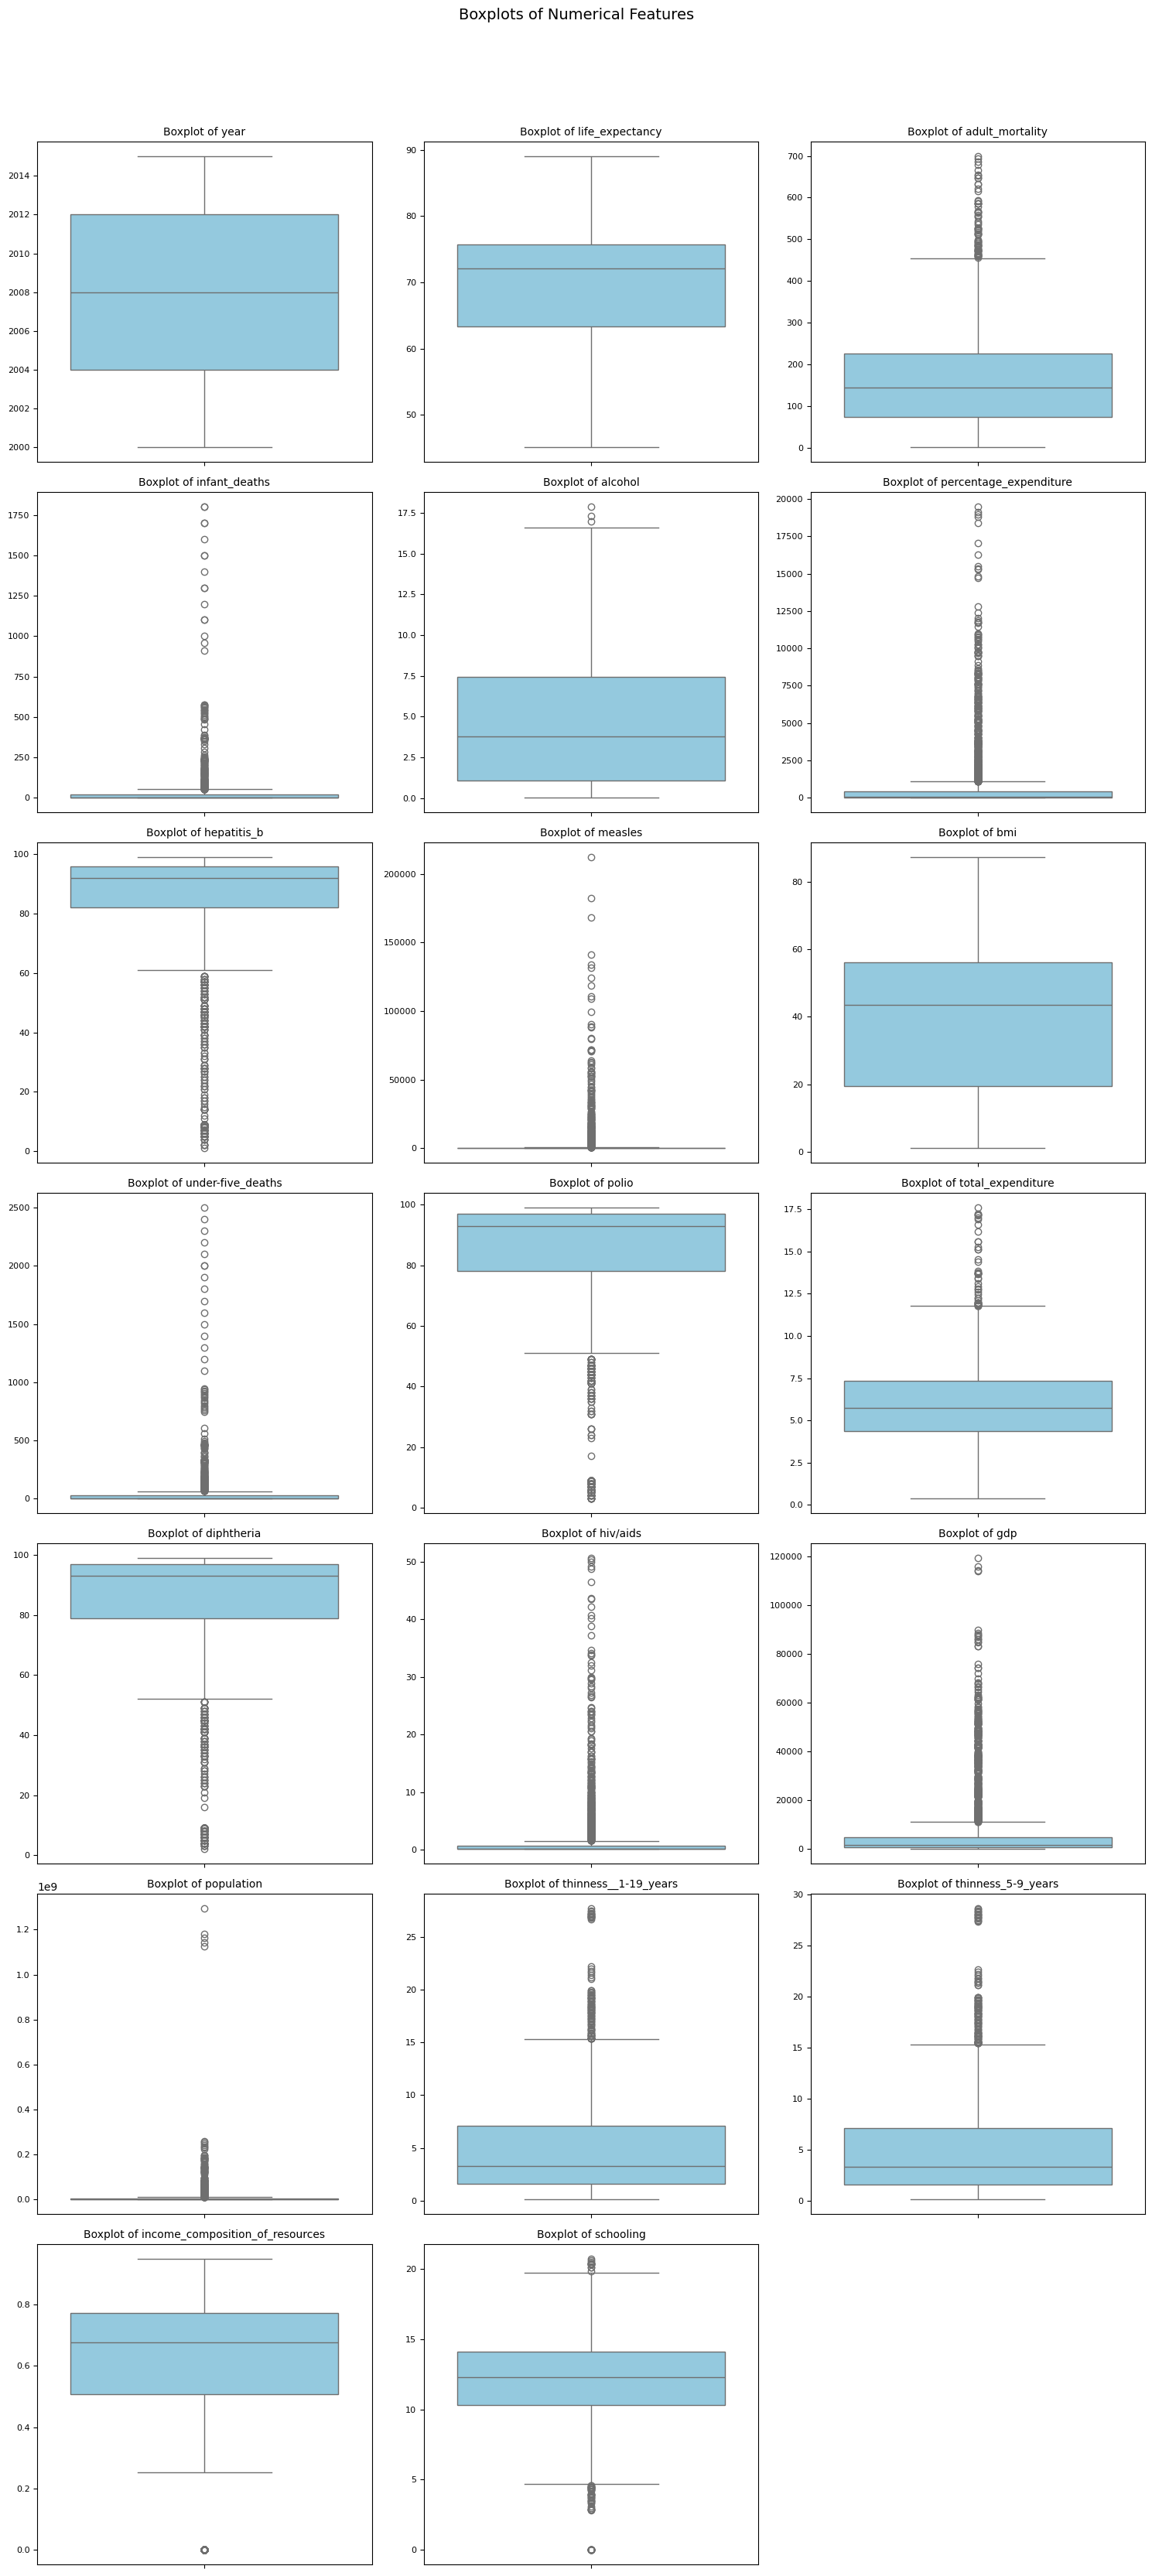

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Select only numerical columns
numerical_cols = df.select_dtypes(include='number').columns.tolist()

# Determine the number of rows and columns for subplots
n_cols = 3  # Number of plots per row
n_rows = int(np.ceil(len(numerical_cols) / n_cols))

# Create subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # Flatten in case of multiple rows

# Plot boxplots for each numerical column
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'Boxplot of {col}', fontsize=10)
    axes[i].set_ylabel('')
    axes[i].tick_params(axis='y', labelsize=8)

# Remove any empty subplots
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.suptitle('Boxplots of Numerical Features', fontsize=14)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


Shape after outlier handling: (2919, 22)


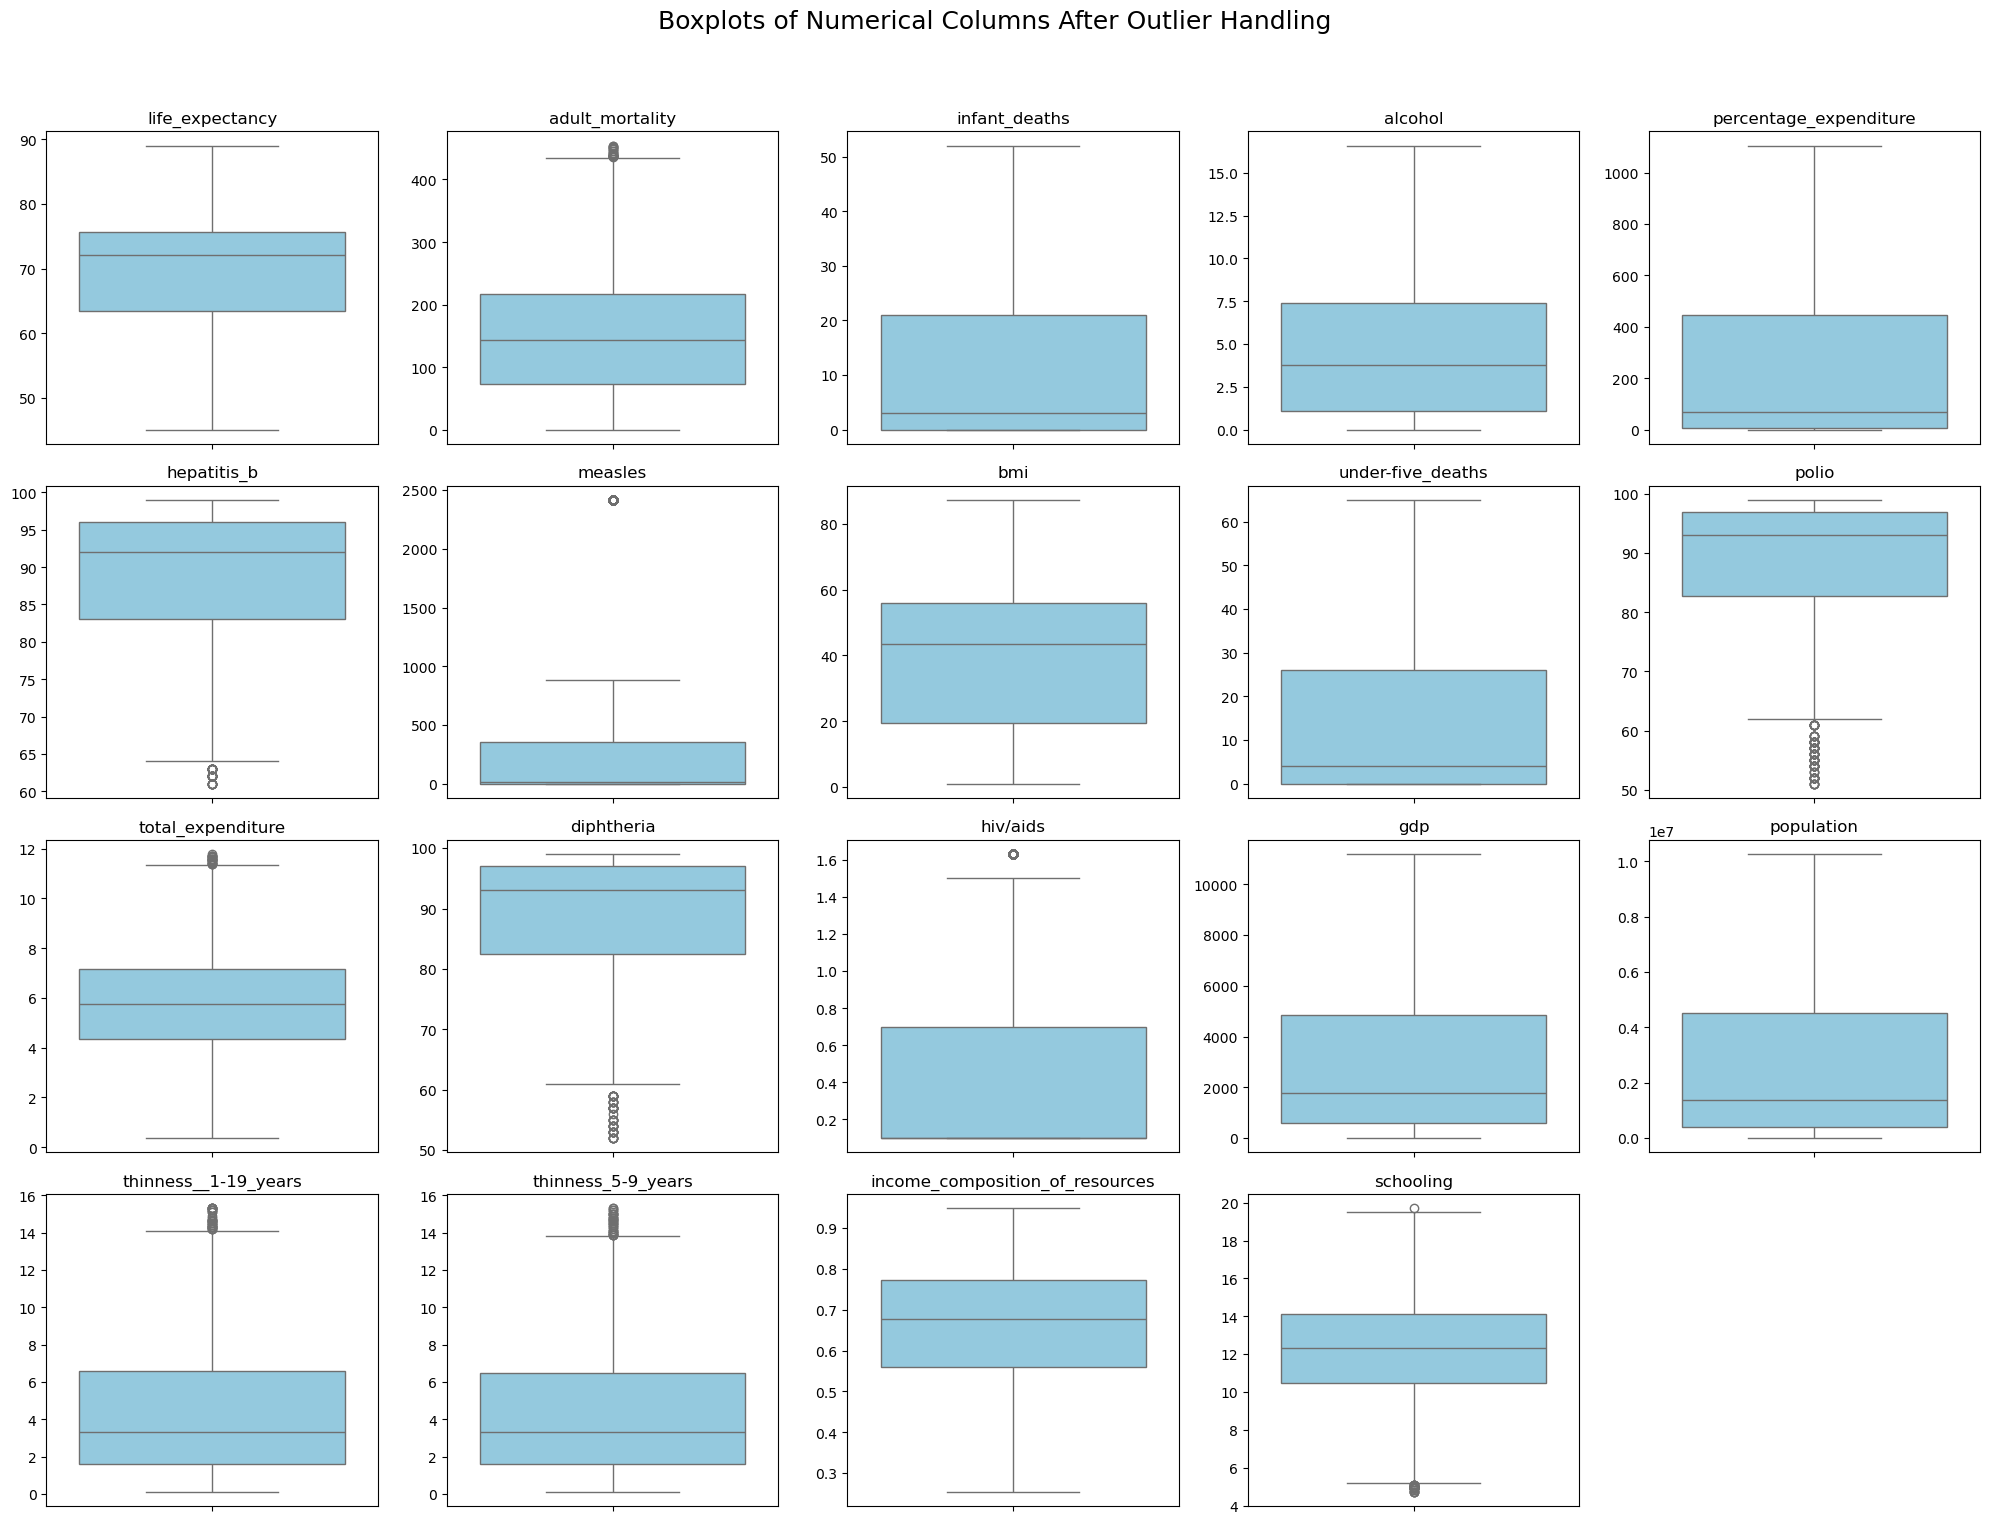

In [79]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Columns you want to handle outliers for (numerical only)
outlier_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Handle outliers using IQR method
for col_name in outlier_cols:
    q1 = df[col_name].quantile(0.25)
    q3 = df[col_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    mean_value = df[col_name].mean()
    df[col_name] = np.where(
        (df[col_name] < lower_bound) | (df[col_name] > upper_bound),
        mean_value,
        df[col_name]
    )

# Check shape after outlier treatment
print("Shape after outlier handling:", df.shape)

# Re-select numeric columns after outlier treatment
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Create subplots for boxplots
fig, axes = plt.subplots(4, 5, figsize=(20, 16))
fig.suptitle('Boxplots of Numerical Columns After Outlier Handling', fontsize=18)

axes = axes.flatten()

# Plot each numerical column
for i, col in enumerate(numerical_cols):
    sns.boxplot(y=df[col], ax=axes[i], color='skyblue')
    axes[i].set_title(f'{col}', fontsize=12)
    axes[i].set_ylabel('')

# Remove empty subplots if any
for j in range(len(numerical_cols), len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


In [74]:
# Outlier removal for 'life_expectancy'
Q1 = df['life_expectancy'].quantile(0.25)
Q3 = df['life_expectancy'].quantile(0.75)
IQR = Q3 - Q1

# Filter out outliers
df = df[~((df['life_expectancy'] < (Q1 - 1.5 * IQR)) | (df['life_expectancy'] > (Q3 + 1.5 * IQR)))]



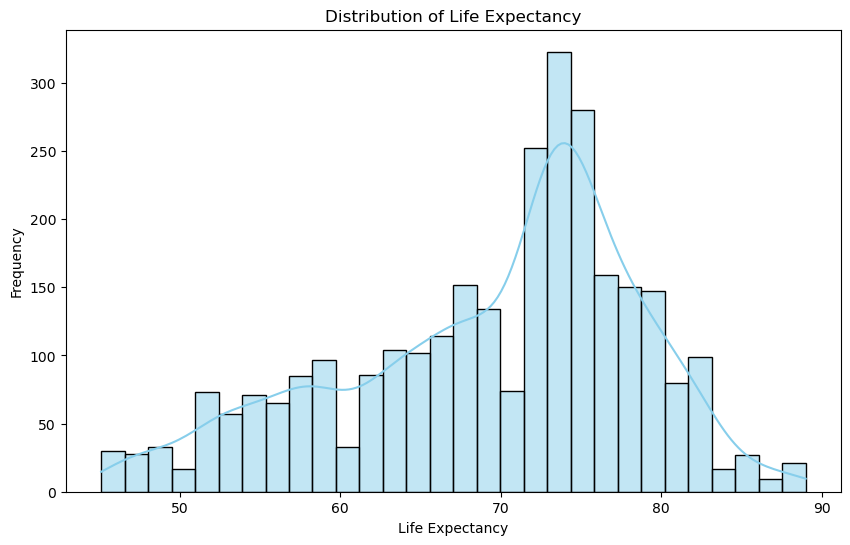

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['life_expectancy'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()


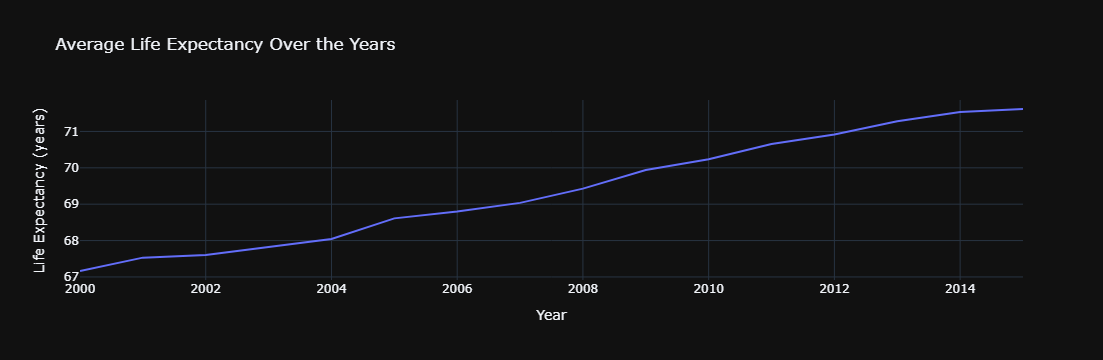

In [83]:
import plotly.express as px

# Calculate average life expectancy per year
average_life_expectancy = df.groupby('year')['life_expectancy'].mean().reset_index()

# Create interactive line plot
fig = px.line(
    average_life_expectancy,
    x='year',
    y='life_expectancy',
    title='Average Life Expectancy Over the Years',
    labels={'year': 'Year', 'life_expectancy': 'Life Expectancy (years)'},
    template='plotly_dark'
)

fig.show()



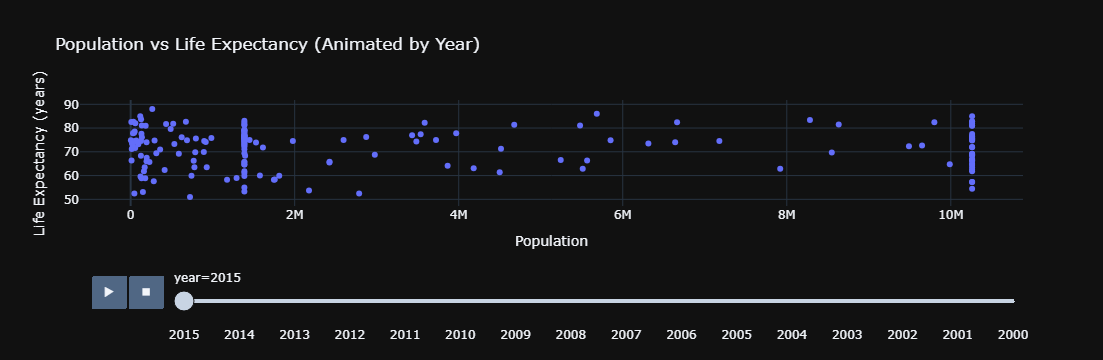

In [85]:
fig = px.scatter(
    df,
    x='population',
    y='life_expectancy',
    hover_name='country',
    animation_frame='year',
    title='Population vs Life Expectancy (Animated by Year)',
    labels={'population': 'Population', 'life_expectancy': 'Life Expectancy (years)'},
    template='plotly_dark'
)

fig.show()


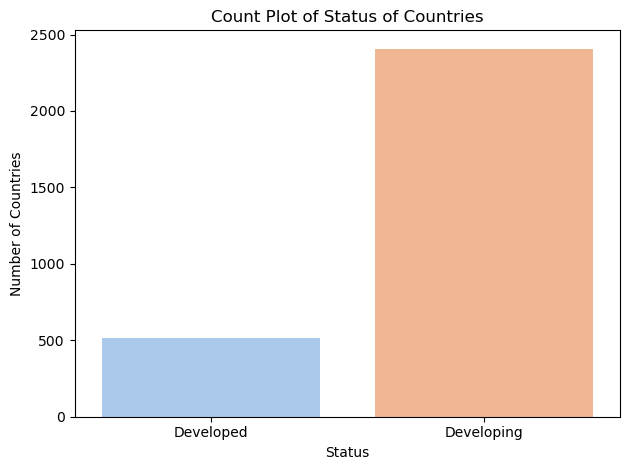

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['status'], palette='pastel')
plt.title('Count Plot of Status of Countries')
plt.xlabel('Status')
plt.ylabel('Number of Countries')
plt.tight_layout()
plt.show()


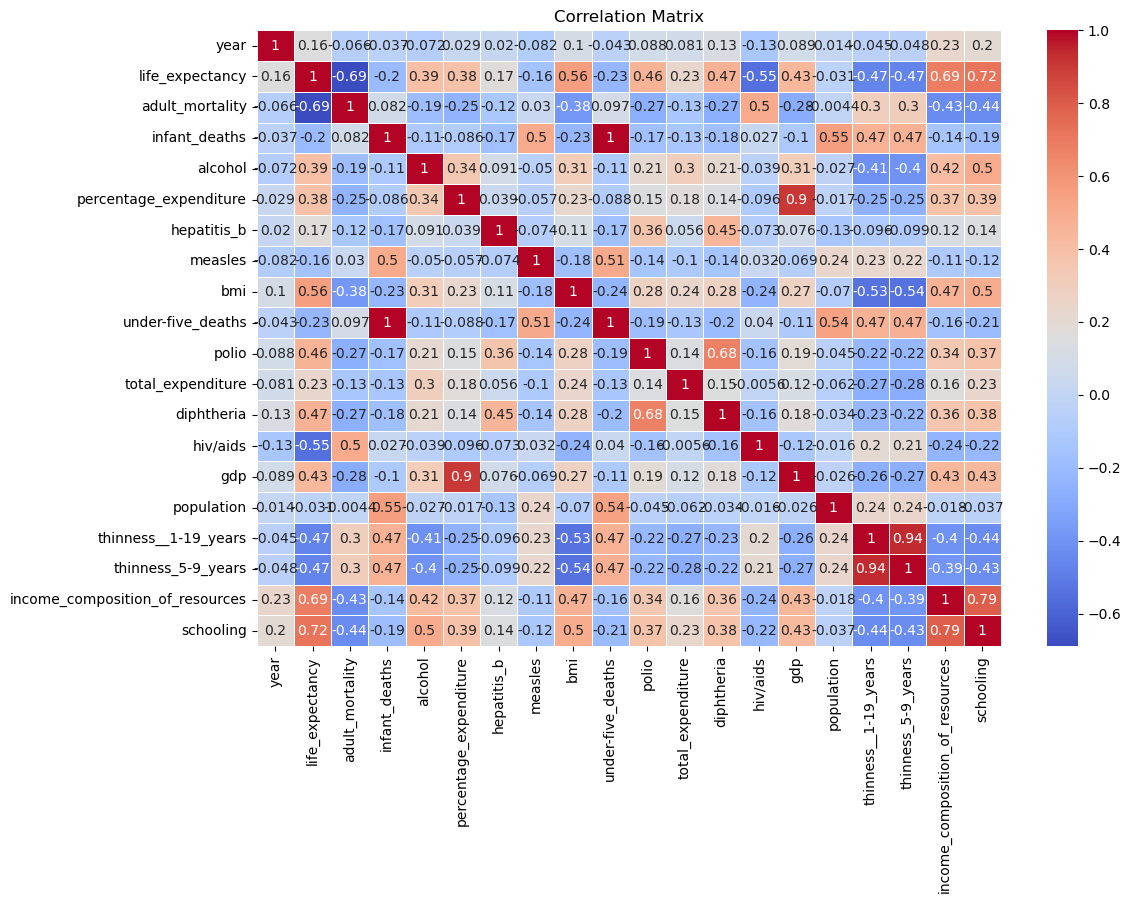

In [58]:
plt.figure(figsize=(12, 8))

# Select only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute the correlation matrix
corr = numeric_df.corr()

# Plot the heatmap
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


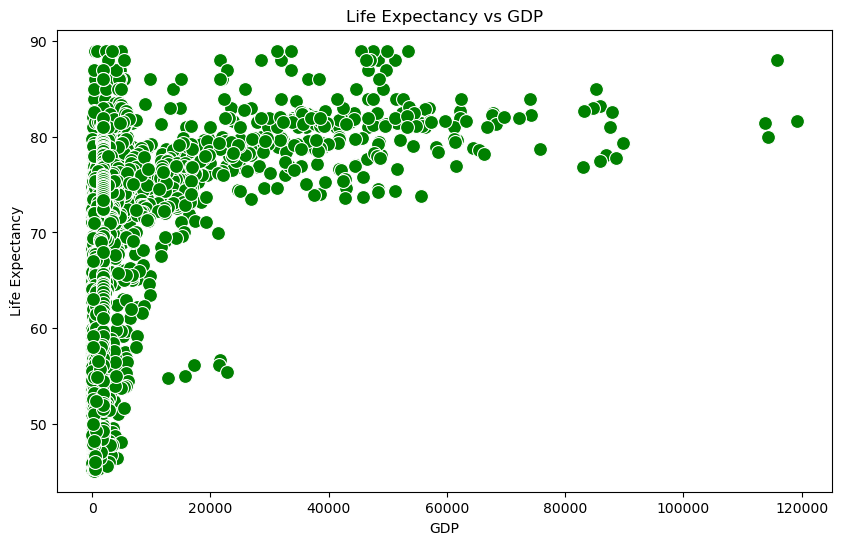

In [60]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='gdp', y='life_expectancy', data=df, color='green', s=100)
plt.title('Life Expectancy vs GDP')
plt.xlabel('GDP')
plt.ylabel('Life Expectancy')
plt.show()


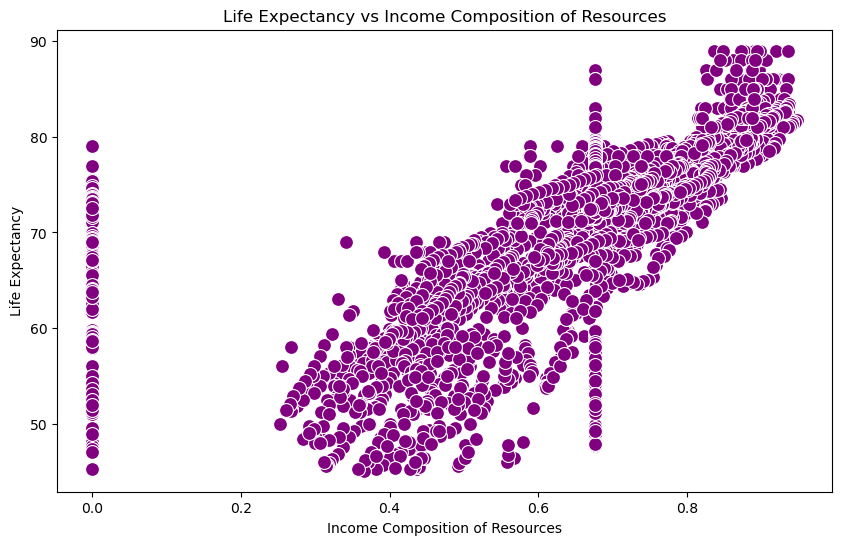

In [62]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='income_composition_of_resources', y='life_expectancy', data=df, color='purple', s=100)
plt.title('Life Expectancy vs Income Composition of Resources')
plt.xlabel('Income Composition of Resources')
plt.ylabel('Life Expectancy')
plt.show()
